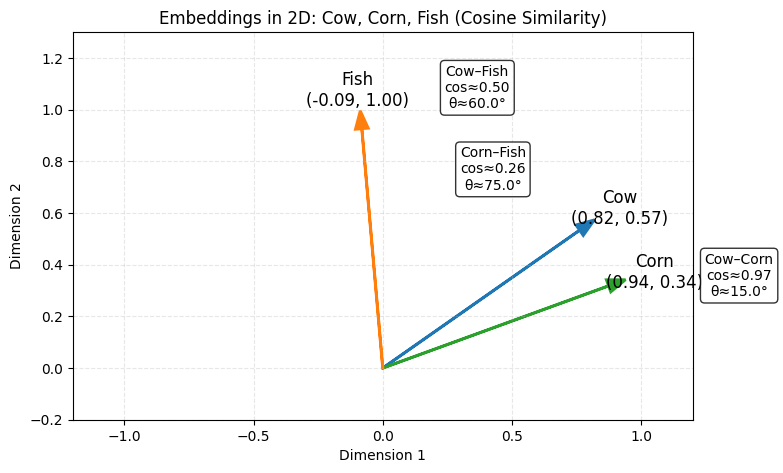

In [5]:
# Move the Corn–Fish box slightly upward for improved positioning

import math
import matplotlib.pyplot as plt

# Same vectors
vectors = {
    "Cow":  (math.cos(math.radians(35)), math.sin(math.radians(35))),
    "Corn": (math.cos(math.radians(20)), math.sin(math.radians(20))),
    "Fish": (math.cos(math.radians(95)), math.sin(math.radians(95))),
}

colors = {"Cow": "#1f77b4", "Corn": "#2ca02c", "Fish": "#ff7f0e"}

def dot(u, v): return u[0]*v[0] + u[1]*v[1]
def norm(u): return math.sqrt(u[0]**2 + u[1]**2)
def cosine_similarity(u, v): return dot(u, v) / (norm(u) * norm(v))
def angle_degrees(u, v):
    cos = max(min(cosine_similarity(u, v), 1.0), -1.0)
    return math.degrees(math.acos(cos))

pairs = [("Cow", "Corn"), ("Cow", "Fish"), ("Corn", "Fish")]
metrics = []
for a, b in pairs:
    u, v = vectors[a], vectors[b]
    cos = cosine_similarity(u, v)
    ang = angle_degrees(u, v)
    metrics.append((a, b, cos, ang))

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Draw vectors
for name, (x, y) in vectors.items():
    ax.arrow(0, 0, x, y, head_width=0.05, head_length=0.07, 
             length_includes_head=True, color=colors[name], linewidth=2)
    ax.text(x * 1.12, y * 1.08, f"{name}\n({x:.2f}, {y:.2f})", fontsize=12, ha="center", va="center")

# Adjusted offsets (move Corn–Fish slightly up)
offsets = {
    ("Cow", "Corn"): (0.5, -0.1),   # right
    ("Cow", "Fish"): (0.0, 0.3),    # up
    ("Corn", "Fish"): (0.0, 0.1),   # up slightly
}

def midpoint(u, v): return ((u[0]+v[0])/2, (u[1]+v[1])/2)

for a, b, cos, ang in metrics:
    u, v = vectors[a], vectors[b]
    mx, my = midpoint(u, v)
    dx, dy = offsets.get((a, b), (0, 0))
    ax.text(mx + dx, my + dy, f"{a}–{b}\ncos≈{cos:.2f}\nθ≈{ang:.1f}°",
            ha="center", va="center", fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.8))

# Axes formatting
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-0.2, 1.3)
ax.set_aspect("equal", adjustable="box")
ax.grid(True, linestyle="--", alpha=0.3)
ax.set_title("Embeddings in 2D: Cow, Corn, Fish (Cosine Similarity)")

plt.show()
